In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Read Dataset and get used columns**

In [2]:
import pandas as pd

dataframe=pd.read_csv("/content/gdrive/My Drive/YoutubeContentAnalysis/dataset.csv")
dataframe.head()

#Drop columns that will not be used
used_dataframe=dataframe.drop(['Unnamed: 0','Video Id'],axis=1) #axis= 1 means drop columns
used_dataframe.head()

,Title,Description,Category
0,Female Squirting | How to Squirt Tutorial,Your watching Female Squirting | How to Squirt...,adult
1,HOW TO SQUIRT 💦 FOR BEGINNERS,Thanks for watching. Video's posted every Tues...,adult
2,How To Make Her Squirt | My Simple Step By Ste...,"Full Guide To Make A Girl Squirt, Blog Post (B...",adult
3,How to Squirt | 2020,Coming Up How to Squirt | 2020 Do you want to ...,adult
4,How To Make Her Squirt How To Squirt Make ...,See my advanced material here: http://www.mind...,adult


# **Drop samples which include missing values **

In [3]:
print("Check number of samples of each column which has null datapoints : ")
print(used_dataframe.isnull().sum())
print("=> Total number of null datap samples should be removed : ",max(used_dataframe.isnull().sum()))
print("Total number of sample before removing NaN : ",len(used_dataframe))
#Remove missing values
used_dataframe=used_dataframe.dropna()
#Refer at here : 
#https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe
print("Total number of sample after removing NaN : ",len(used_dataframe))

Check number of samples of each column which has null datapoints : 
Title             0
Description    1165
Category          0
dtype: int64
=> Total number of null datap samples should be removed :  1165
Total number of sample before removing NaN :  21803
Total number of sample after removing NaN :  20638


# **Preprocess data to make it cleaner**

1.Remove punctuations and convert word to lowercase


In [4]:
import string
punctuation_list=string.punctuation

# Remove Punctuation and convert to lower case

used_dataframe['Title']=used_dataframe['Title'].apply(lambda x : ' '.join([word.lower() for word in x.split() if word not in punctuation_list]))
used_dataframe['Description']=used_dataframe['Description'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in punctuation_list]))
used_dataframe.head()

,Title,Description,Category
0,female squirting how to squirt tutorial,your watching female squirting how to squirt t...,adult
1,how to squirt 💦 for beginners,thanks for watching. video's posted every tues...,adult
2,how to make her squirt my simple step by step ...,"full guide to make a girl squirt, blog post (b...",adult
3,how to squirt 2020,coming up how to squirt 2020 do you want to se...,adult
4,how to make her squirt how to squirt make her ...,see my advanced material here: http://www.mind...,adult


2. Remove non-alphabet characters.
This performance also removes number

In [5]:
used_dataframe['Title']=used_dataframe['Title'].apply(lambda x : ' '.join([word for word in x.split() if word.isalpha()]))
used_dataframe['Description']=used_dataframe['Description'].apply(lambda x : ' '.join([word for word in x.split() if word.isalpha()]))
used_dataframe.head()

,Title,Description,Category
0,female squirting how to squirt tutorial,your watching female squirting how to squirt t...,adult
1,how to squirt for beginners,thanks for posted every tuesday sunday follow ...,adult
2,how to make her squirt my simple step by step ...,full guide to make a girl blog post,adult
3,how to squirt,coming up how to squirt do you want to see the...,adult
4,how to make her squirt how to squirt make her ...,see my advanced material how to make her squir...,adult


3. Remove stopwords

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_set=set(stopwords.words('english'))
used_dataframe['Title']=used_dataframe['Title'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopwords_set]))
used_dataframe['Description']=used_dataframe['Description'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopwords_set]))
used_dataframe.head()
print(stopwords_set)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'are', 'not', 'more', 'herself', "hadn't", 'my', 'aren', 'those', 'be', 'that', "she's", 'me', 'o', 'this', 'did', 'ours', 'out', 'most', 'there', 'at', 'up', 'above', 'because', 'him', 'both', 'such', 'before', 'themselves', 'during', 'doing', 'through', "isn't", 'other', 'on', 'yourself', 'if', 'itself', 'any', "weren't", "mustn't", 'hers', 'was', "you'll", 'ourselves', 'they', 'over', "needn't", 'ain', 'am', 'about', 'all', 'myself', 'which', 'should', 'ma', 'what', "it's", 'further', 'from', 'in', 'it', 'theirs', 'our', 'being', 'who', "shan't", 'then', 'than', 'we', "you'd", 'to', 'again', 'nor', 'so', 'against', 'yours', 'these', 's', "won't", "don't", 'didn', 'same', 'has', 'as', 'can', 'no', 've', 'while', 'and', "wasn't", 'won', 'of', "should've", 'by', 'd', 'his', 'have', 'shan', "hasn't", 'haven', 'some', 'for', 'wasn', 're', 'but', 'isn', "mightn't", 'coul

4. remove url link

In [7]:
import re
used_dataframe['Title'] = used_dataframe['Title'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
used_dataframe['Description']=used_dataframe['Description'].apply(lambda x : re.split('https:\/\/.*',str(x))[0])
used_dataframe.head()

,Title,Description,Category
0,female squirting squirt tutorial,watching female squirting squirt tutorial want...,adult
1,squirt beginners,thanks posted every tuesday sunday follow soci...,adult
2,make squirt simple step step method give squir...,full guide make girl blog post,adult
3,squirt,coming squirt want see content sexy head sex,adult
4,make squirt squirt make squirt high,see advanced material make squirt foolproof st...,adult


5. Lemmatization

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()
used_dataframe['Title']=used_dataframe['Title'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
used_dataframe['Description']=used_dataframe['Description'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
used_dataframe.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Description,Category
0,female squirting squirt tutorial,watching female squirting squirt tutorial want...,adult
1,squirt beginner,thanks posted every tuesday sunday follow soci...,adult
2,make squirt simple step step method give squir...,full guide make girl blog post,adult
3,squirt,coming squirt want see content sexy head sex,adult
4,make squirt squirt make squirt high,see advanced material make squirt foolproof st...,adult


# **Label Encoder**

In [9]:
from sklearn.preprocessing import LabelEncoder 

labelencoder=LabelEncoder()
used_dataframe['Category']=labelencoder.fit_transform(used_dataframe['Category'])
used_dataframe.head()

,Title,Description,Category
0,female squirting squirt tutorial,watching female squirting squirt tutorial want...,0
1,squirt beginner,thanks posted every tuesday sunday follow soci...,0
2,make squirt simple step step method give squir...,full guide make girl blog post,0
3,squirt,coming squirt want see content sexy head sex,0
4,make squirt squirt make squirt high,see advanced material make squirt foolproof st...,0


# **Concatenate 2 columns and shuffle dataframe**

In [10]:
import numpy as np
used_dataframe['Title+Description']=used_dataframe['Title']+" "+used_dataframe['Description']
used_dataframe=used_dataframe.reindex(np.random.permutation(used_dataframe.index))
Title_Description=used_dataframe.values[:,3]
y=used_dataframe.values[:,2]
print(Title_Description[0])
print(y[0])
used_dataframe.head()

death stalin proclaimed funniest political comedy daily death stalin delivers brutally executed parody cold war
1


,Title,Description,Category,Title+Description
9147,death stalin,proclaimed funniest political comedy daily dea...,1,death stalin proclaimed funniest political com...
6099,movie clip sick stick hd,movie buy miss hottest new clip,0,movie clip sick stick hd movie buy miss hottes...
16775,must biggest derby english football reaction,original live tv back another reaction video r...,2,must biggest derby english football reaction o...
11176,long night short morning face scene movieclips,long night short morning james visit girl know...,1,long night short morning face scene movieclips...
15295,battle china,battle chapter vi frank explains empire japan ...,2,battle china battle chapter vi frank explains ...


# **Text to sequences **

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


n_most_common=20000
max_length=150
tokenizer=Tokenizer(n_most_common,oov_token="OOV",lower=True)
tokenizer.fit_on_texts(Title_Description)
print(tokenizer.word_index)
print("Vocab size : ",len(tokenizer.word_index))

#text to sequence
truncating='pre'
padding='post'
sequences=tokenizer.texts_to_sequences(Title_Description)
print("Samples after text to number")
print(sequences)
print("An example : ")
print(Title_Description[2])
print(sequences[2])
X=pad_sequences(sequences,max_length,padding=padding,truncating=truncating)
print("After convert to sequences we have Input's shape : ",X.shape)
print(X[2])

Output hidden; open in https://colab.research.google.com to view.

# **Split Data**

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_val_test,y_train,y_val_test=train_test_split(X,y,test_size=0.3)
X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5)
print("Shape of X_train,y_train : ",X_train.shape)
print("Shape of X_val,y_val: ",X_val.shape,y_val.shape)
print("Shape of X_test,y_test: ",X_test.shape,y_test.shape)

Shape of X_train,y_train :  (15478, 150)
Shape of X_val,y_val:  (2580, 150) (2580,)
Shape of X_test,y_test:  (2580, 150) (2580,)


# **DataLoader**

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#convert to tensor
X_train_tensor=torch.from_numpy(X_train)
X_val_tensor=torch.from_numpy(X_val)
y_train_tensor=torch.from_numpy(np.array(y_train.astype(np.float32)))
y_val_tensor=torch.from_numpy(np.array(y_val.astype(np.float32)))
X_test_tensor=torch.from_numpy(X_test)
y_test_tensor=torch.from_numpy(np.array(y_test.astype(np.float32)))

#Tensor dataset
train_dataset=TensorDataset(X_train_tensor.long(),y_train_tensor.long())
val_dataset=TensorDataset(X_val_tensor.long(),y_val_tensor.long())
test_dataset=TensorDataset(X_test_tensor.long(),y_test_tensor.long())

#dataloader
batch_size=128
train_loader=DataLoader(train_dataset,batch_size=batch_size)
val_loader=DataLoader(val_dataset,batch_size=batch_size)
test_loader=DataLoader(test_dataset,batch_size=batch_size)


# **Define Model **

In [14]:
"""
import torch.nn as nn

if torch.cuda.is_available():
  device="cuda:0"
else:
  device="cpu"

class LSTM(nn.Module):
  def __init__(self,vocab_size,emb_size,hidden_size,output_size):
    super(LSTM,self).__init__()
    self.vocab_size=vocab_size
    self.emb_size=emb_size
    self.hidden_size=hidden_size
    self.output_size=output_size

    #embedding layer
    self.embedding=nn.Embedding(vocab_size,emb_size)

    #self lstm layer
    self.lstm=nn.GRU(emb_size,hidden_size,batch_first=True,bidirectional=True,num_layers=2)

    #fc
    self.fc=nn.Linear(hidden_size,output_size)

  def forward(self,inputs):
    emb=self.embedding(inputs)
    out,ht=self.lstm(emb)
    output=nn.LeakyReLU(0.02)(ht[-1])
    output=nn.Dropout(0.2)(output)
    output=self.fc(output)
    return output

vocab_size=n_most_common
emb_size=200
hidden_size=256
output_size=4
lstm=LSTM(vocab_size,emb_size,hidden_size,output_size).to(device)
"""
"""
for inputs,labels in test_loader:
  #print((inputs).shape)
  print(lstm(inputs).shape)
"""


'\nfor inputs,labels in test_loader:\n  #print((inputs).shape)\n  print(lstm(inputs).shape)\n'

# **Define Loss and Optimizer**

In [15]:
"""
learning_rate=0.001
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(lstm.parameters(),lr=learning_rate)
"""

'\nlearning_rate=0.001\ncriterion=nn.CrossEntropyLoss()\noptimizer=torch.optim.Adam(lstm.parameters(),lr=learning_rate)\n'

In [16]:
"""
epochs=1
train_loss_list=[]
val_loss_list=[]
train_acc_list=[]
val_acc_list=[]

def eval(dataloader):
  with torch.no_grad():
    total_loss=0
    correct=0
    number=0
    for inputs,labels in dataloader:
      inputs,labels=inputs.to(device),labels.to(device)
      batch_predicted=lstm(inputs)
      labels=labels.long().squeeze_()
      batch_loss=criterion(batch_predicted,labels)
      total_loss+=batch_loss.item()*len(inputs)
      idx_predicted=torch.max(batch_predicted,1)[1]
      correct+=(idx_predicted==labels).sum()
      number+=len(inputs)
    return total_loss/number,correct.item()/number*100

    

for epoch in range(epochs):
  step=0
  train_correct=0
  train_total=0
  for inputs,labels in train_loader:
    inputs,labels=inputs.to(device),labels.to(device)
    lstm.zero_grad()
    batch_train_predicted=lstm(inputs)
    labels=labels.long().squeeze_()
    batch_train_loss=criterion(batch_train_predicted,labels)
    batch_train_loss.backward()
    optimizer.step()

    #train evaluate:
    train_total+=len(inputs)
    train_idx_predicted=torch.max(batch_train_predicted,1)[1]
    train_correct+=(train_idx_predicted==labels).sum()

    if(step%10==0):
      print("Epoch : ",epoch+1,"/ ",epochs,"At step : ",step,"/",len(X_train)//batch_size,"Batch train loss : ",batch_train_loss.item())
    step+=1

  #val evaluate:
  train_loss,train_acc=eval(train_loader)
  val_loss,val_acc=eval(val_loader)
  print("EPOCH :",epoch+1,"/",epochs,"Train loss : ",train_loss,",Val Loss :",val_loss,"Train accuracy : ",train_correct.item()/train_total*100,", Val accuracy: ",val_acc)
  train_loss_list.append(train_loss)
  train_acc_list.append(train_acc)
  val_loss_list.append(val_loss)
  val_acc_list.append(val_acc)
  """

'\nepochs=1\ntrain_loss_list=[]\nval_loss_list=[]\ntrain_acc_list=[]\nval_acc_list=[]\n\ndef eval(dataloader):\n  with torch.no_grad():\n    total_loss=0\n    correct=0\n    number=0\n    for inputs,labels in dataloader:\n      inputs,labels=inputs.to(device),labels.to(device)\n      batch_predicted=lstm(inputs)\n      labels=labels.long().squeeze_()\n      batch_loss=criterion(batch_predicted,labels)\n      total_loss+=batch_loss.item()*len(inputs)\n      idx_predicted=torch.max(batch_predicted,1)[1]\n      correct+=(idx_predicted==labels).sum()\n      number+=len(inputs)\n    return total_loss/number,correct.item()/number*100\n\n    \n\nfor epoch in range(epochs):\n  step=0\n  train_correct=0\n  train_total=0\n  for inputs,labels in train_loader:\n    inputs,labels=inputs.to(device),labels.to(device)\n    lstm.zero_grad()\n    batch_train_predicted=lstm(inputs)\n    labels=labels.long().squeeze_()\n    batch_train_loss=criterion(batch_train_predicted,labels)\n    batch_train_loss.bac

In [17]:
"""
import matplotlib.pyplot as plt
steps=len(train_loss_list)

#visualize loss
plt.plot(np.arange(steps),train_loss_list,'r')
plt.plot(np.arange(steps),val_loss_list,'g')
plt.xlabel("Epoch ",fontsize=20,color='r')
plt.ylabel("Loss value : ",fontsize=20,color='r')
plt.title("LOSS Visualization ",fontsize=30,color='m')
plt.legend(["Train","Val"],loc='upper right')"""

'\nimport matplotlib.pyplot as plt\nsteps=len(train_loss_list)\n\n#visualize loss\nplt.plot(np.arange(steps),train_loss_list,\'r\')\nplt.plot(np.arange(steps),val_loss_list,\'g\')\nplt.xlabel("Epoch ",fontsize=20,color=\'r\')\nplt.ylabel("Loss value : ",fontsize=20,color=\'r\')\nplt.title("LOSS Visualization ",fontsize=30,color=\'m\')\nplt.legend(["Train","Val"],loc=\'upper right\')'

In [18]:
"""
#Acc visualization
plt.plot(np.arange(steps),train_acc_list,'r')
plt.plot(np.arange(steps),val_acc_list,'g')
plt.xlabel("Epoch ",fontsize=20,color='r')
plt.ylabel("Accuracy value : ",fontsize=20,color='r')
plt.title("ACCURACY Visualization ",fontsize=30,color='m')
plt.legend(['Train, Val'],loc='lower right')
"""

'\n#Acc visualization\nplt.plot(np.arange(steps),train_acc_list,\'r\')\nplt.plot(np.arange(steps),val_acc_list,\'g\')\nplt.xlabel("Epoch ",fontsize=20,color=\'r\')\nplt.ylabel("Accuracy value : ",fontsize=20,color=\'r\')\nplt.title("ACCURACY Visualization ",fontsize=30,color=\'m\')\nplt.legend([\'Train, Val\'],loc=\'lower right\')\n'

# **Test Evaluation**

In [19]:
"""
test_loss,test_acc=eval(test_loader)
print("Test LOSS: ",test_loss)
print("TEST ACCURACY : ",test_acc)
"""

'\ntest_loss,test_acc=eval(test_loader)\nprint("Test LOSS: ",test_loss)\nprint("TEST ACCURACY : ",test_acc)\n'

# **test with keras**

In [20]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,GlobalMaxPool1D,LeakyReLU,Conv1D,GRU,BatchNormalization
from keras.utils.np_utils import to_categorical

# One-hot Encode labels
output_size=3
vocab_size=n_most_common
emb_size=256
y_train_np= to_categorical(y_train,num_classes=output_size)
y_val_np=to_categorical(y_val,num_classes=output_size)
y_test_np=to_categorical(y_test,num_classes=output_size)

In [21]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(vocab_size, emb_size, input_length=X.shape[1]))
#model.add(Conv1D(128,kernel_size=3,padding='same'))
#model.add(LeakyReLU(0.02))
model.add(SpatialDropout1D(0.2))
#model.add(GRU(256))
model.add(Bidirectional(GRU(256,return_sequences=False,dropout=0.2,recurrent_dropout=0.2)))
#model.add(Bidirectional(GRU(256,return_sequences=True,dropout=0.2,recurrent_dropout=0.2)))
#model.add(Bidirectional(GRU(128,return_sequences=False,dropout=0.2,recurrent_dropout=0.2)))
model.add(BatchNormalization(momentum=0.9))
#model.add(Bidirectional(LSTM(256,dropout=0.2,recurrent_dropout=0.1)))
model.add(LeakyReLU(0.02))
#model.add(LSTM(256, dropout=0.2,return_sequences=True, recurrent_dropout=0.2))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

#model.add(Dense(64))
model.add(LeakyReLU(0.02))
model.add(Dense(output_size, activation='softmax'))

learning_rate=0.001
optim=keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 256)          5120000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 150, 256)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               789504    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1

In [22]:
# Training LSTM Model
from keras.callbacks import ModelCheckpoint
epochs = 5
batch_size = 128
mcp_save = ModelCheckpoint('/content/gdrive/My Drive/YoutubeContentAnalysis/best_model_saved.h5', save_best_only=True, monitor='val_accuracy',verbose=1)
history = model.fit(X_train, y_train_np, epochs=epochs, batch_size=batch_size,validation_data=(X_val,y_val_np),callbacks=[mcp_save])

Epoch 1/5
121/121 [==============================] - ETA: 0s - loss: 0.3096 - accuracy: 0.8783
Epoch 00001: val_accuracy improved from -inf to 0.94264, saving model to /content/gdrive/My Drive/YoutubeContentAnalysis/best_model_saved.h5
121/121 [==============================] - 100s 829ms/step - loss: 0.3096 - accuracy: 0.8783 - val_loss: 0.1582 - val_accuracy: 0.9426
Epoch 2/5
121/121 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9731
Epoch 00002: val_accuracy did not improve from 0.94264
121/121 [==============================] - 99s 819ms/step - loss: 0.0829 - accuracy: 0.9731 - val_loss: 0.1687 - val_accuracy: 0.9384
Epoch 3/5
121/121 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9888
Epoch 00003: val_accuracy did not improve from 0.94264
121/121 [==============================] - 99s 822ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.2200 - val_accuracy: 0.9329
Epoch 4/5
121/121 [==============================] - ETA: 0s 

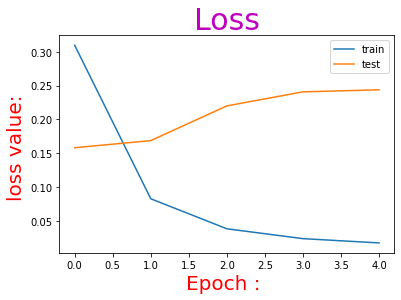

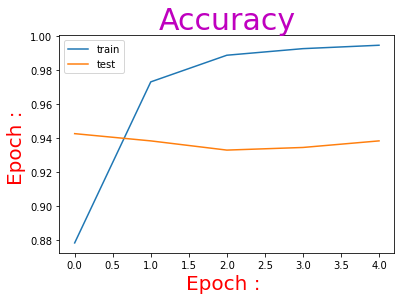

In [23]:
import matplotlib.pyplot as plt
plt.title('Loss',fontsize=30,color='m')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch : ",fontsize=20,color='r')
plt.ylabel("loss value: ",fontsize=20,color='r')
plt.legend()
plt.show();

plt.title('Accuracy',fontsize=30,color='m')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch : ",fontsize=20,color='r')
plt.ylabel("Epoch : ",fontsize=20,color='r')
plt.legend()
plt.show();

In [24]:
from keras.models import load_model
model=load_model("/content/gdrive/My Drive/YoutubeContentAnalysis/best_model_saved.h5")
score = model.evaluate(X_test, y_test_np, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]*100}')

Test loss: 0.15595008432865143 / Test accuracy: 94.57364082336426


# **Confusion matrix**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


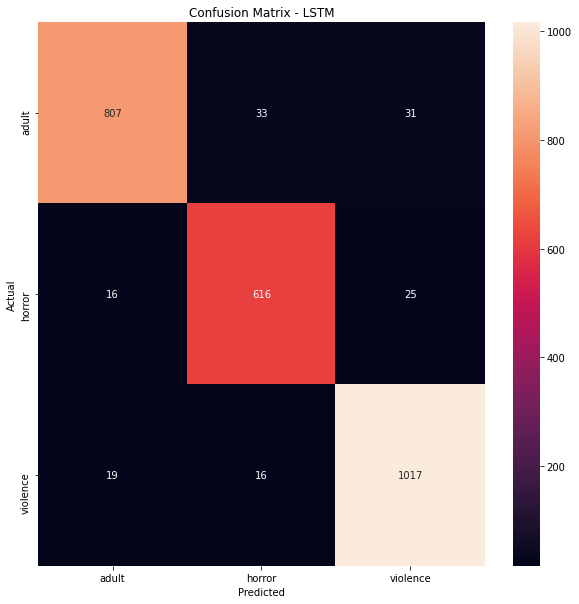

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_conf=np.argmax(y_test_np,axis=1)
y_pred=model.predict(X_test)
y_pred_conf=np.argmax(y_pred,axis=1)

conf_matrix=confusion_matrix(y_test_conf,y_pred_conf)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=list(labelencoder.classes_), yticklabels=list(labelencoder.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()